In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
data = pd.read_csv("/content/drive/MyDrive/dataset/report_2018-2019.csv")

In [26]:
data.tail()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089
311,144,Zimbabwe,2018,3.692,0.357,1.094,0.248,0.406,0.132,0.099


In [27]:
data.head()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [28]:
data=data.rename(columns={"Overall rank": "Overall_rank",
                          "Country or region": "Country_or_region",
                          "GDP per capita": "GDP_per_capita",
                          "Social support": "Social_support",
                          "Healthy life expectancy": "Healthy_life_expectancy",
                          "Freedom to make life choices": "Freedom_to_make_life_choices",
                          "Perceptions of corruption": "Perceptions_of_corruption"})

In [29]:
data

,Overall_rank,Country_or_region,Year,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [30]:
x = np.array(data.loc[:,"Social_support"]).reshape(-1,1)
y = np.array(data.loc[:,"Score"]).reshape(-1,1)

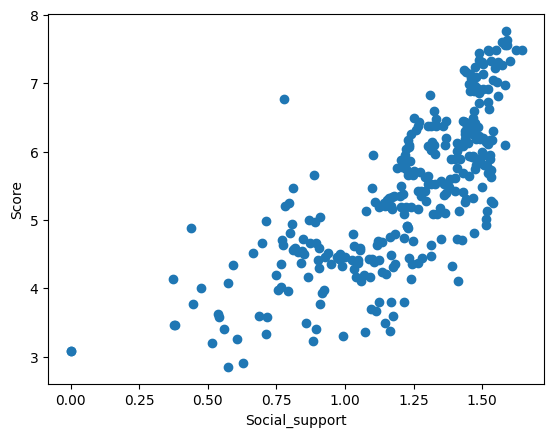

In [31]:
plt.scatter(x,y)
plt.xlabel("Social_support")
plt.ylabel('Score')
plt.show()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [33]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.6394453541984573


In [34]:
poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.6105413689067759


In [35]:
X_new = np.linspace(0, 132, 200).reshape(200, 1)

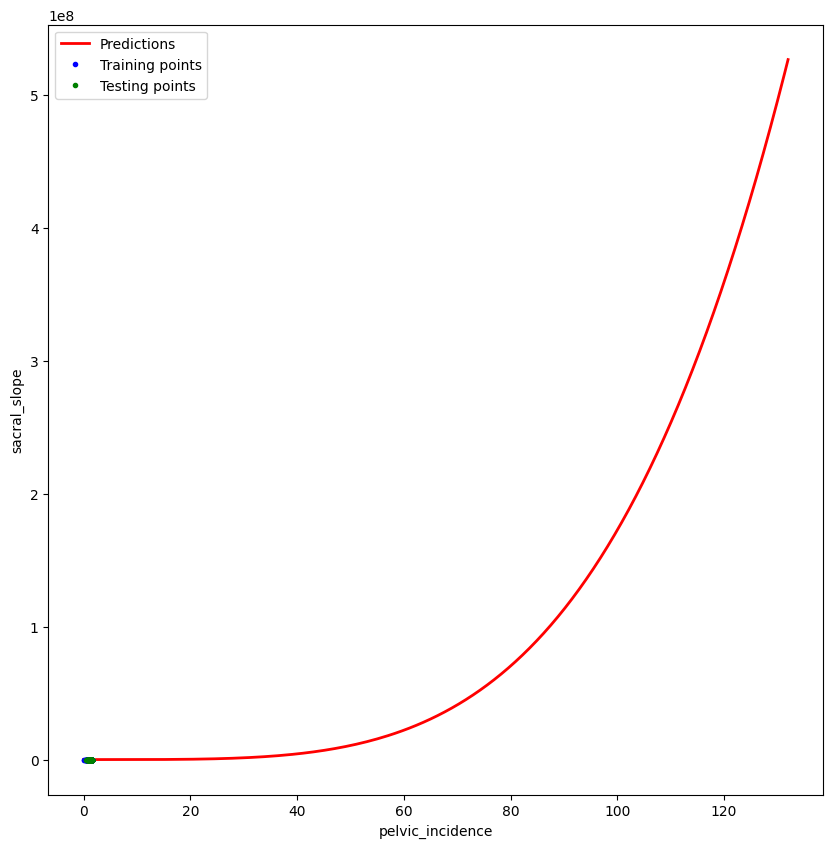

In [36]:
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.figure(figsize=[10,10])
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("pelvic_incidence")
plt.ylabel('sacral_slope')
plt.legend()
plt.show()